# Setup

In [1]:
import ROOT
import numpy as np
import mplhep as hep

/home/thea/devel/dune-trigger/root-test/.venv/lib/python3.14/site-packages/ROOT/__init__.py:5: UserWarning: 
This distribution of ROOT is in alpha stage. Feedback is welcome and appreciated. Feel free to reach out to the user forum for questions and general feedback at https://root-forum.cern.ch or to submit an issue at https://github.com/root-project/root/issues. Do not rely on this distribution for production purposes.

  warnings.warn(
/home/thea/devel/dune-trigger/root-test/.venv/lib/python3.14/site-packages/cppyy/__init__.py:374: UserWarning: CPyCppyy API not found (tried: /home/thea/.local/share/uv/python/cpython-3.14.0-linux-x86_64-gnu/include/site/python3.14); set CPPYY_API_PATH envar to the 'CPyCppyy' API directory to fix
  warnings.warn("CPyCppyy API not found (tried: %s); "


# Read in the generator/ke columns from the rad sample

In [2]:
rdf = ROOT.RDataFrame(f'triggerAna/mctruths', "../data/radbkg/data_fixed/radiological_decay0_dunevd10kt_1x8x6_patched_wall_gammas_*_evfix_ana.ntuple.root")

arr = rdf.AsNumpy(columns=["generator_name", "kinetic_energy", "pdg"])

# Plot kinetic energy for all generators

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

mct_ke = pd.DataFrame(arr)

mct_ke_df = mct_ke.query('pdg==11')
max_ke = mct_ke_df.kinetic_energy.max()
max_ke = 5e-3
num_bkg=20

print("Grouping mctruth objects")

part_by_gen = sorted([(n,df) for n,df in mct_ke_df.groupby('generator_name')], reverse=True, key=lambda x: len(x[1]))
top_by_gen = part_by_gen[:num_bkg]
print("Grouping completed")

all_gens = mct_ke_df.generator_name.unique()
colors = plt.cm.tab10.colors 
color_map = {pdg: colors[i % len(colors)] for i, pdg in enumerate(all_gens)}

bins=np.linspace(0,max_ke*1000,200)
fig,axes=plt.subplots(1,1, figsize=(12,10))

ax=axes
print("Creating histograms")
for gen_id, df in top_by_gen:

    (df.kinetic_energy*1000).hist(bins=bins, label=f"{gen_id}", histtype='step', ax=ax)

ax.legend()
ax.set_yscale('log')
ax.set_ylabel('counts')
ax.set_xlabel(r'$E_{kin}$')
ax.set_title('MCThruths particles')


NameError: name 'arr' is not defined

Grouping completed
Creating histograms


Text(0.5, 1.0, 'MCThruths particles')

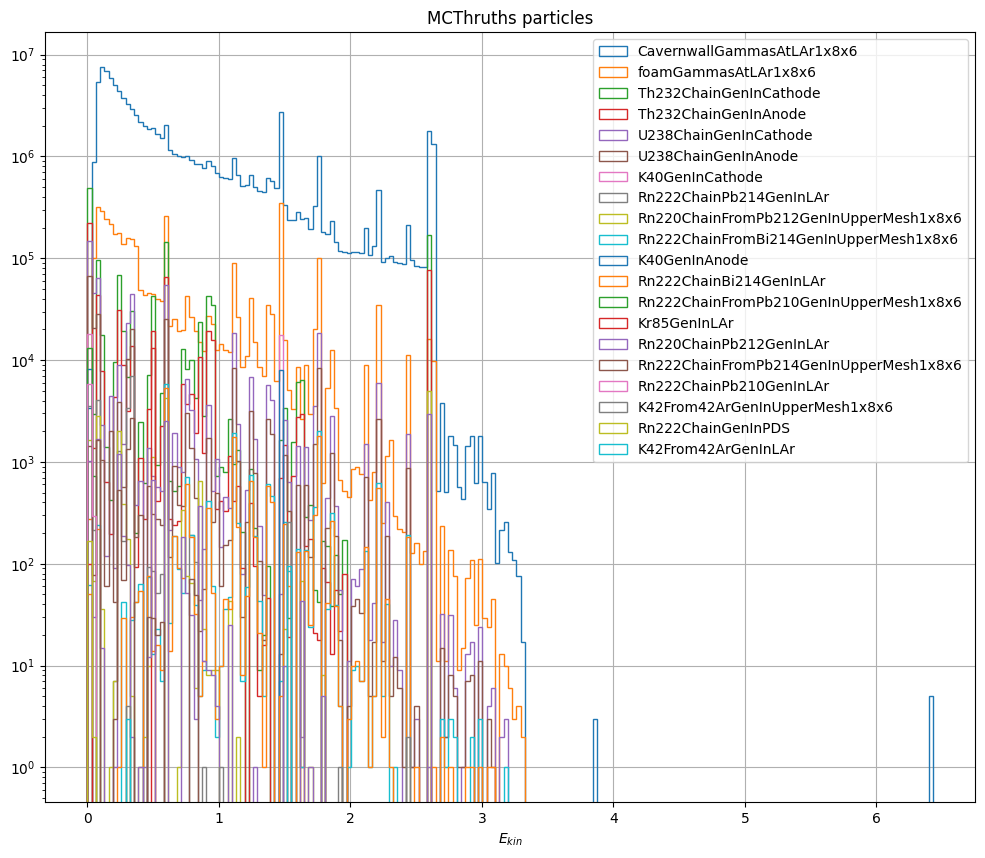

In [ ]:

mct_ke_df = mct_ke.query('pdg==22')
max_ke=mct_ke_df.kinetic_energy.max()
max_ke = 5e-3
num_bkg=20

print("Grouping mctruth objects")

part_by_gen = sorted([(n,df) for n,df in mct_ke_df.groupby('generator_name')], reverse=True, key=lambda x: len(x[1]))
top_by_gen = part_by_gen[:num_bkg]
print("Grouping completed")

all_gens = mct_ke_df.generator_name.unique()
colors = plt.cm.tab10.colors 
color_map = {pdg: colors[i % len(colors)] for i, pdg in enumerate(all_gens)}

bins=np.linspace(0,max_ke*1000,200)
fig,axes=plt.subplots(1,1, figsize=(12,10))

ax=axes
print("Creating histograms")
for gen_id, df in top_by_gen:

    (df.kinetic_energy*1000).hist(bins=bins, label=f"{gen_id}", histtype='step', ax=ax)

ax.legend()
ax.set_yscale('log')
ax.set_ylabel('counts')
ax.set_xlabel(r'$E_{kin}$')
ax.set_title('MCThruths particles')


In [4]:
mct_ke

,generator_name,kinetic_energy,pdg
0,Rn222ChainBi214GenInLAr,0.000478,11
1,Rn222ChainBi214GenInLAr,0.007687,1000020040
2,Rn222ChainBi214GenInLAr,0.000558,11
3,Rn222ChainBi214GenInLAr,0.001120,22
4,Rn222ChainBi214GenInLAr,0.000609,22
...,...,...,...
333684038,Rn220ChainFromPb212GenInUpperMesh1x8x6,0.000583,22
333684039,Rn220ChainFromPb212GenInUpperMesh1x8x6,0.002615,22
333684040,Rn220ChainFromPb212GenInUpperMesh1x8x6,0.000009,11
333684041,Rn220ChainFromPb212GenInUpperMesh1x8x6,0.000583,22
